# 종합실습2 이변량분석(y-숫자) : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 1.환경준비

### (1) 라이브러리 로딩

In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### (2) 데이터 로딩

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [57]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head() # 행은 지역

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [58]:
target = 'Sales'

## 1.숫자형 X --> Y

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### (1) Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

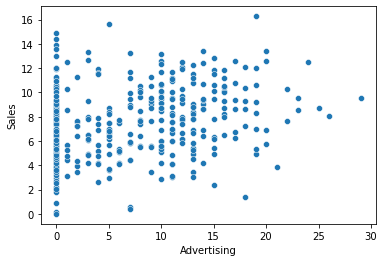

In [59]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

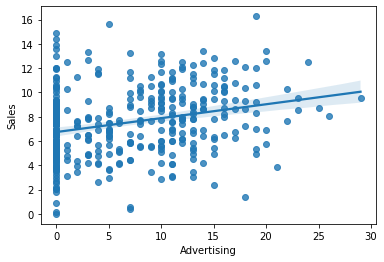

In [60]:
sns.regplot(x=var, y = target, data = data)
plt.show()

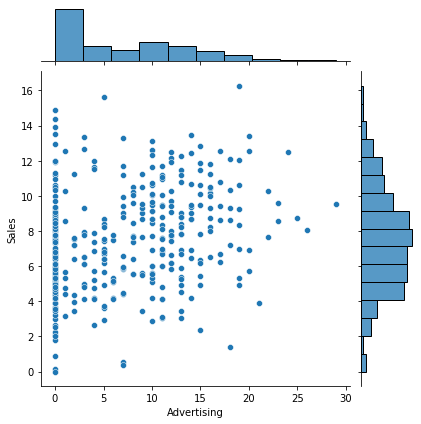

In [61]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [62]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2695067813769019, p-value : 4.377677110302732e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

### (2) Population -> Sales

1) 시각화 : scatter(regplot), jointplot

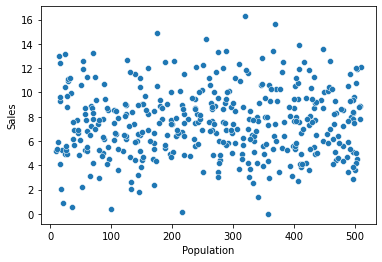

In [63]:
var = 'Population'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

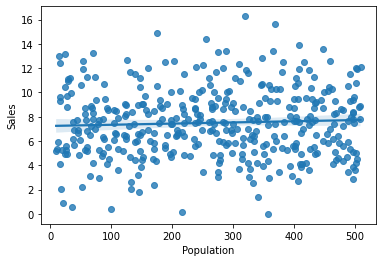

In [64]:
sns.regplot(x=var, y = target, data = data)
plt.show()

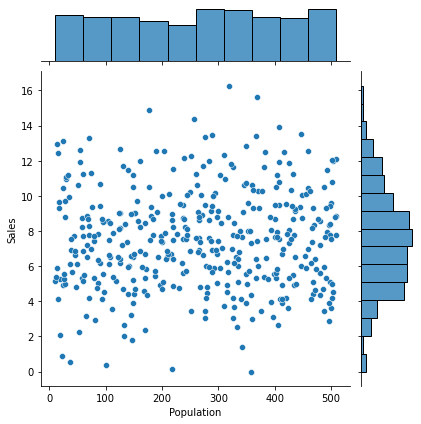

In [65]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

- 선형 관계가 특별히 없어보인다
- 매출은 인구수와 관련없어보인다
- 인구가 아니라 타게팅을 해서 분석해야한다

2) 수치화 : 상관분석

In [66]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.050470984472039196, p-value : 0.31398160931903


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) Price -> Sales

1) 시각화 : scatter(regplot), jointplot

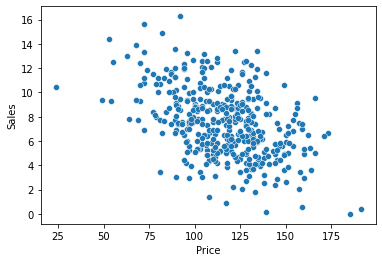

In [67]:
var = 'Price'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

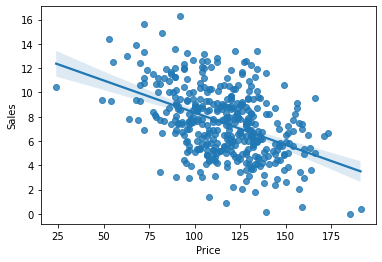

In [68]:
sns.regplot(x=var, y = target, data = data)
plt.show()

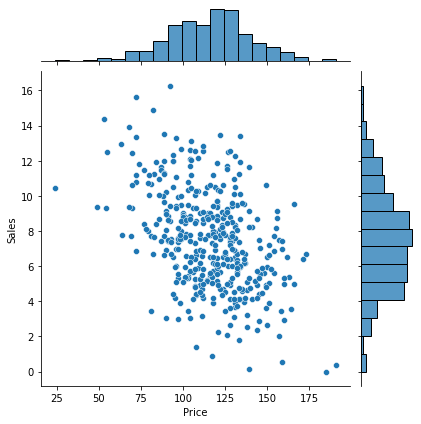

In [69]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [70]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4449507278465725, p-value : 7.61818701191294e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 대략적으로 봤을때는 음의 상관관계로 보이나,아주 강하지는 않아 보인다

### (4) Age -> Sales

1) 시각화 : scatter(regplot), jointplot

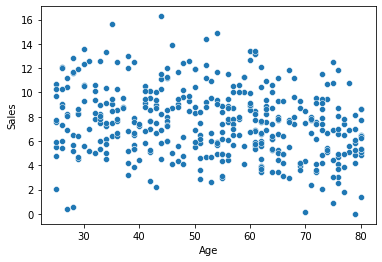

In [71]:
var = 'Age'
sns.scatterplot(x=var, y=target, data=data)
plt.show()

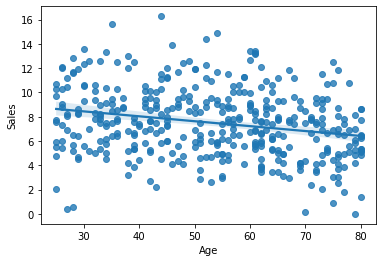

In [72]:
sns.regplot(x=var, y=target, data=data)
plt.show()

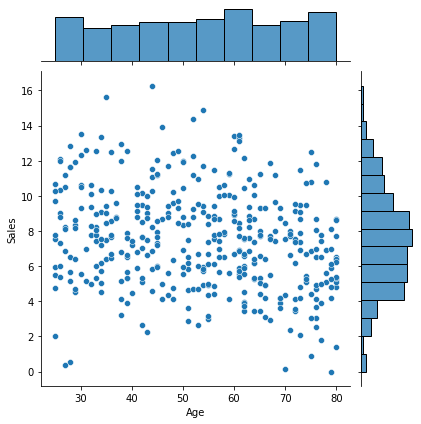

In [73]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [74]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.23181543960457654, p-value : 2.7889498393711916e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 약간의 음의 상관관계로 보이며, 약한 상관관계가 있다
- 전체 연령보다 연령대로 쪼개서 분석하는 과정이 필요해보인다

### (5) CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

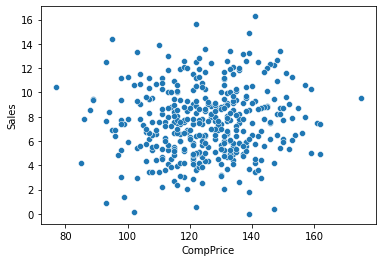

In [75]:
var = 'CompPrice'
sns.scatterplot(x=var, y=target, data=data)
plt.show()

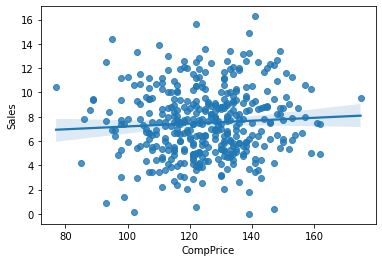

In [76]:
sns.regplot(x=var, y=target, data=data)
plt.show()

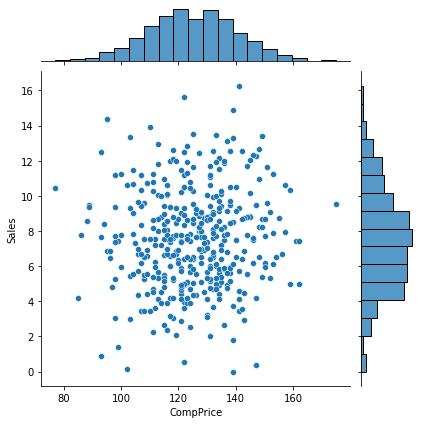

In [77]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [78]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062152, p-value : 0.2009398289418295


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 시각화 및 상관분석시 상관관계가 없어보임
- 경쟁사 가격이 판매량에 영향을 안준다

*생각
- 기업입장에선 판매 / 고객입장에선 구매다
- 저쪽이 비싸면 여기서 살거야 = 기업입장
- 데이터 생성해서 생각

In [79]:
data['Price_diff'] = data['CompPrice'] - data['Price']
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US,Price_diff
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes,18
1,11.22,111,48,16,260,83,Good,65,Yes,Yes,28
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes,33
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes,20
4,4.15,141,64,3,340,128,Bad,38,Yes,No,13


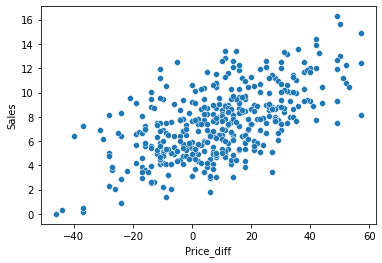

In [80]:
var='Price_diff'
sns.scatterplot(x=var,y=target ,data=data)
plt.show()

In [81]:
spst.pearsonr(data[var], data[target])

(0.5979217124533922, 3.8771206417886146e-40)

- 경쟁사와 가격차이로 판매액과의 영향을 주는것으로 보인다

### (6) Income -> Sales

1) 시각화 : scatter(regplot), jointplot

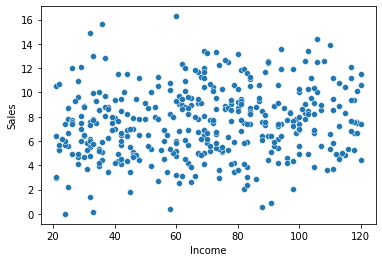

In [82]:
var = 'Income'
sns.scatterplot(x=var, y=target, data=data)
plt.show()

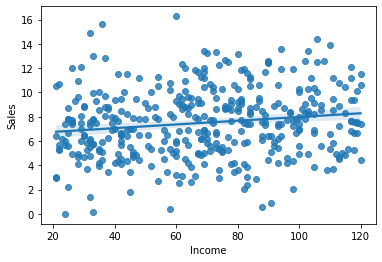

In [83]:
sns.regplot(x=var, y=target, data=data)
plt.show()

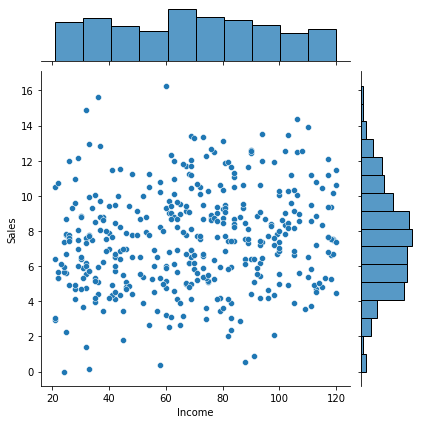

In [84]:
sns.jointplot(x=var, y=target, data=data)
plt.show()

2) 수치화 : 상관분석

In [85]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.15195097946754427, p-value : 0.0023096704539517627


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 소득수준이 판매량과 상관관계가 있으나, 상관계수가 낮아 큰 관계는 없어 보인다
- 필수품이기 때문에 큰 차이 없어 보인다

## 2.범주형 X --> Y

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### (1) Urban -> Sales

1) 시각화 : 평균비교 barplot

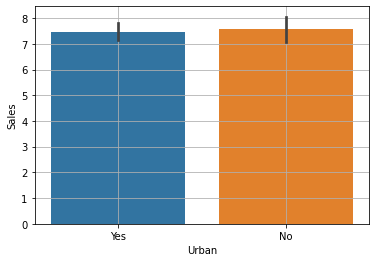

In [86]:
feature = 'Urban'
sns.barplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [87]:
g1 = data.loc[ data[feature] =='Yes', target]
g2 = data.loc[ data[feature] =='No', target]

In [88]:
spst.ttest_ind(g1, g2)

Ttest_indResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (2) ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

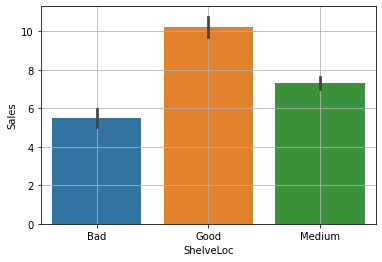

In [89]:
feature = 'ShelveLoc'
sns.barplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [90]:
g1 = data.loc[ data[feature] =='Good', target]
g2 = data.loc[ data[feature] =='Medium', target]
g3 = data.loc[ data[feature] =='Bad', target]

In [91]:
spst.f_oneway(g1, g2, g3) # 3개 비교는 f_oneway

F_onewayResult(statistic=92.22990509910349, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 진열상태따라 판매량 달라진다
- 진열상태 안좋은지점 개선이 필요하다

### (3) US-> Sales

1) 시각화 : 평균비교 barplot

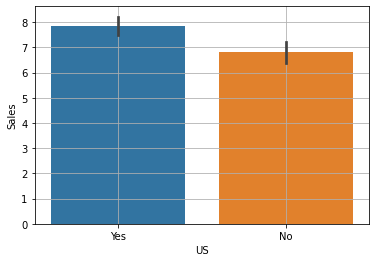

In [92]:
feature = 'US'
sns.barplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [93]:
g1 = data.loc[ data[feature] =='Yes', target]
g2 = data.loc[ data[feature] =='No', target]

In [94]:
spst.ttest_ind(g1, g2)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

## 3.관계 정리하기 / 주관적

① 강한관계

- ShelveLoc, US

② 중간관계

- Advertising, Price, Price_diff

③ 관계없음

- Population, Age, CompPrice, Income, Urban

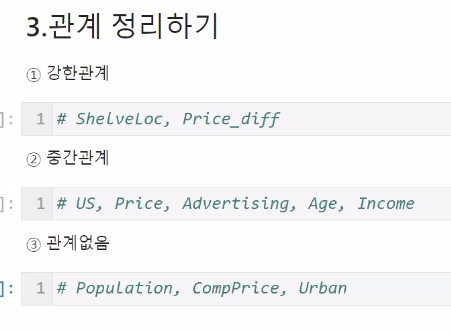